# AB Testing for Marketing Strategies 

# Load Dataset and Packages

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
df = pd.read_csv('Dataset\MarketingCampaigns.csv')

In [8]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [13]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [12]:
df.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

# Data Analysis and Visualization

**Promotion effect on sales**

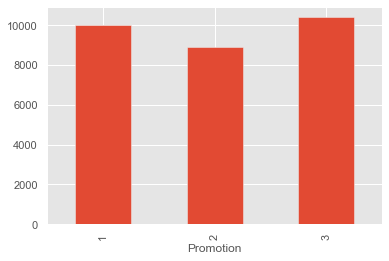

In [21]:
df.groupby('Promotion').sum()['SalesInThousands'].plot(kind='bar')

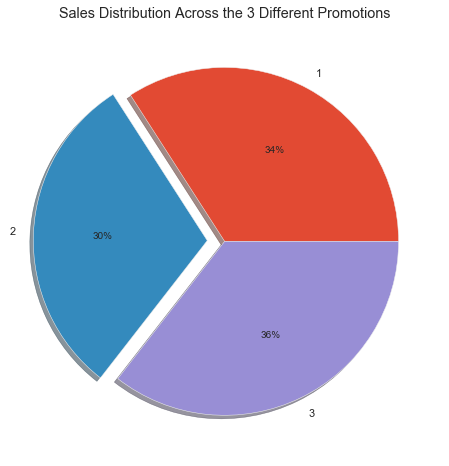

In [20]:
# Using ggplot's style
plt.style.use('ggplot')
ax = df.groupby('Promotion').sum()['SalesInThousands'].plot.pie(figsize=(8,8),
                                                                autopct='%1.0f%%',
                                                                shadow=True,
                                                                explode = (0, 0.1, 0))
ax.set_ylabel('')
ax.set_title('Sales Distribution Across the 3 Different Promotions')

plt.show()

**Promotion in each market size**

In [22]:
df.groupby(['Promotion','MarketSize']).count()['MarketID']

Promotion  MarketSize
1          Large          56
           Medium         96
           Small          20
2          Large          64
           Medium        108
           Small          16
3          Large          48
           Medium        116
           Small          24
Name: MarketID, dtype: int64

In [24]:
df.groupby(['Promotion','MarketSize']).count()['MarketID'].unstack('MarketSize')

MarketSize,Large,Medium,Small
Promotion,,,
1,56,96,20
2,64,108,16
3,48,116,24


[Text(0, 0.5, 'count'),
 Text(0.5, 1.0, 'Breakdowns of market sizes across different promotions')]

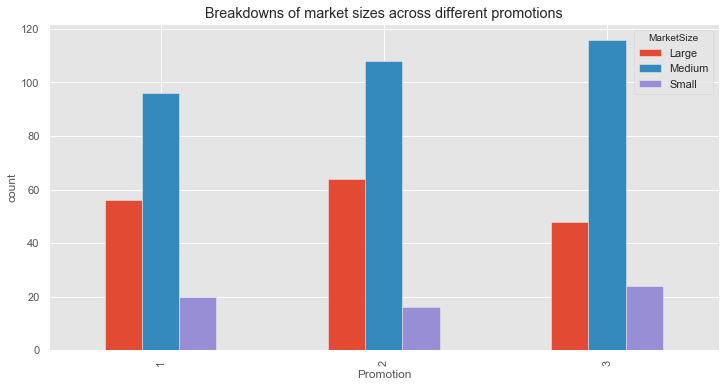

In [28]:
ax = df.groupby(['Promotion','MarketSize']).count()['MarketID'].unstack('MarketSize').plot.bar(figsize=(12,6))
ax.set(ylabel='count',title='Breakdowns of market sizes across different promotions')

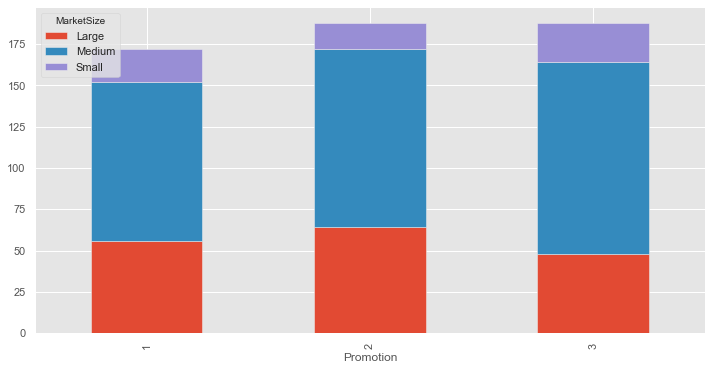

In [34]:
df_marketsizax = df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(12,6),
    grid=True,
    stacked=True)

ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

**Effect of StoreAge**

[Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'Overall distribution over StoreAges')]

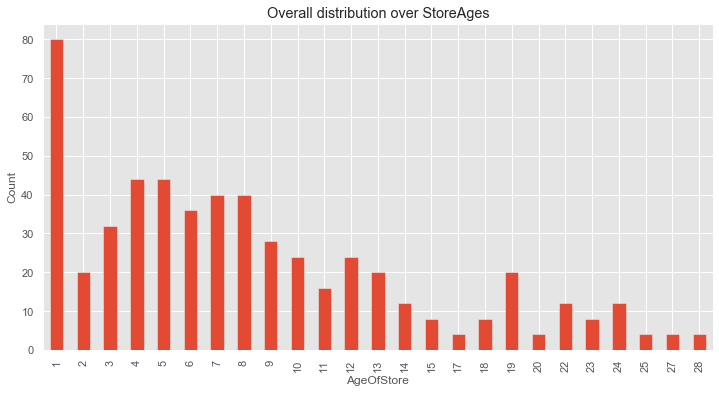

In [36]:
ax = df.groupby('AgeOfStore').count()['MarketID'].plot.bar(figsize=(12,6))
ax.set(ylabel='Count',title='Overall distribution over StoreAges')

In [38]:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


# Performing AB Testing

In [44]:
df.groupby('Promotion').describe()['SalesInThousands']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,58.099012,16.553782,30.81,46.3525,55.385,63.6175,99.65
2,188.0,47.329415,15.108955,17.34,38.1700,45.385,51.7450,88.64
3,188.0,55.364468,16.766231,22.18,44.1975,51.165,61.7325,96.48


**t_value**
The t-value measures the degree of difference relative to the variation in our data groups. Large t-values indicate a higher degree of difference between the groups.

**p_value**
P-value measures the probability that the results would occur by random chance. Therefore the smaller the p-value is, the more statistically significant difference there will be between the two groups.

In [46]:
from scipy import stats

In [48]:
t, p = stats.ttest_ind(df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
                       df.loc[df['Promotion'] == 2, 'SalesInThousands'].values, 
                       equal_var=False)
print("t-value = " +str(t))
print("p-value = " +str(p))

t-value = 6.42752867090748
p-value = 4.2903687179871785e-10


**P-Value is close to 0** which suggests that there is good evidence to **REJECT the Null Hypothesis**. Meaning the there is a statistical difference between the two groups. Our threshold rejectings the Null is usually less than 0.05.

**t-test** shows that the marketing performances for these two groups are significantly different and that promotion group 1 outperforms promotion group 2.

**Now compare promotion 1 and promotion 3**

In [50]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 3, 'SalesInThousands'].values, 
    equal_var=False)

print("t-value = " +str(t))
print("p-value = " +str(p))


t-value = 1.5560224307758634
p-value = 0.12059147742229478


running a t-test between these two groups, gives us a t-value of 1.556 and a p-value of 0.121. 

The computed **p-value is a lot higher than 0.05**, past the threshold for statistical significancer

The AB test shows that Promotion 1 is significantly different than Promotion 2. But there is not enough evidence to show that Promotion 1 is different from Promoition 3.